# Clustering 

![](./img/fire_up.jpeg)


### Learning Objectives:
- Understand how hierarchical clustering finds groups in data
- Understand how k-means clustering finds groups in data
- Compare and contrast hierarchical clustering and k-means
- Build and interpret a dendrogram
- Apply k-means and hierarchical clustering  
- Select the appropriate number of clusters using k-means and use the Silhouette and the elbow method

***
# Introduction 

### Supervised vs. Unsupervised Machine Learning 
Recall from our previous lesson in **supervised learning**, where we **use a number of features to predict a label**. In **unsupervised** ML problem, we are not predicting and labels, thus **we do not have a ground truth** to compare our models to. In other words, we are doing the best we can to **group individual observations together** without having a gold standard to evaluate them. 

![](https://scikit-learn.org/stable/_static/ml_map.png)

### Intuition
Clustering is a **family of techniques** for identifying clusters in a dataset. The goal of clustering is to **group the most similar observations together** into a cluster. In Hierarchical Clustering, we prioritize **similarity** between individual observations.

For Example:

- You work for the marketing department within large company that manages a customer base. 
- For each customer you have a record of average purchase cost and time since last purchase. 
- You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups? 



# Hierarchical Agglomerative Clustering

Hierarchical clustering sets out to group the most similar two observations together from a bottom-up level. We end up with a tree-like diagram named **dendrogram**, which allows us to view the clusterings obtained for each possible number of clusters, from 1 to n. It is up to our discretion as data scientists to decide how many clusters we want. 
***
### How does the algorithm work
Initially, every observation is its own cluster. As we move up the leaf of the dendrogram, the most similar pair of observation fuse together, and the next most similar group of leafs fuse together etc. until everything fuse together into a big cluster. Where to cut off branching that fuse together the tree is up to our discretion. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from plot_hci import plot_agglomerative_algorithm

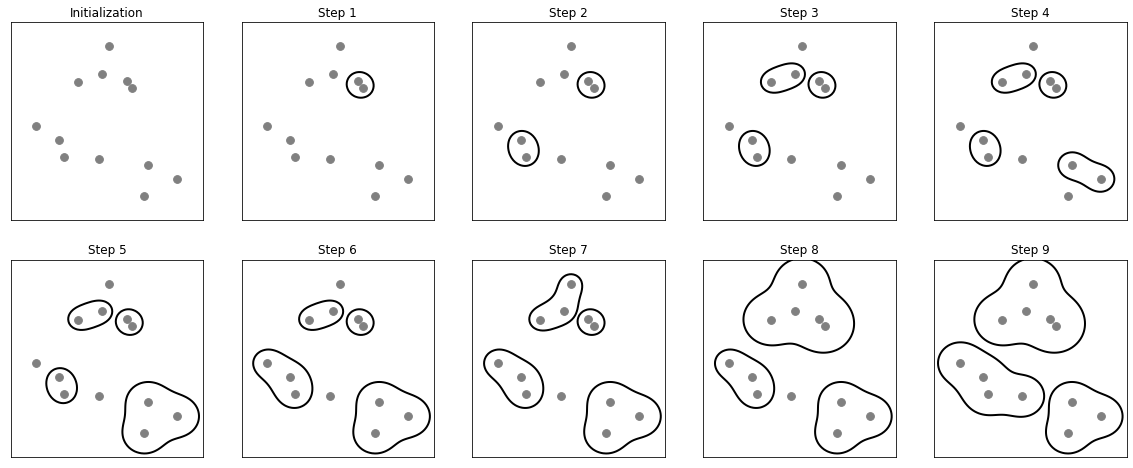

In [4]:
plot_agglomerative_algorithm()

### Types of hierarchical aggplomerative clustering 
- Single Linkage 
    -  Minimum pair-wise distance: for any two clusters, take one observation from each and determine their minimum distance. Do this over and over, until you have identified the overall minimum pair-wise distance. 
- Complete Linkage
    -  Nearest may be defined as the furthest (or maximum) distance between two clusters. That is, all possible pairwise distances between elements (one from cluster A and one from B) are evaluated and the largest value is used as the distance between clusters A & B. This is sometimes called complete linkage and is also called furthest neighbor.
- Average Linkage
    - The distance between clusters is defined as the average distance between the average values of each of the data points in the clusters. 


In [60]:
# lets generate some data and look at an example of hierarchical agglomerative clustering 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(100, 2)


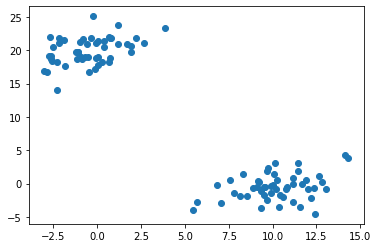

In [62]:
np.random.seed(1000)  
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[50,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])

In [10]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'single')

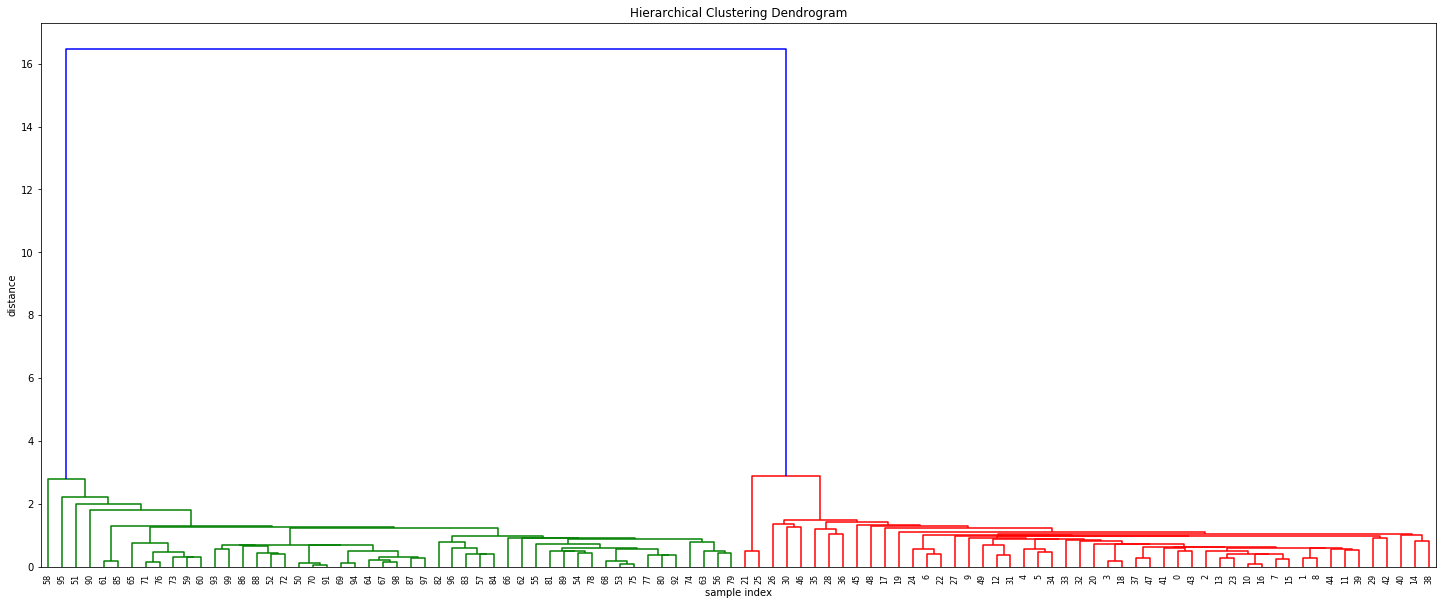

In [11]:
# calculate and construct the dendrogram
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

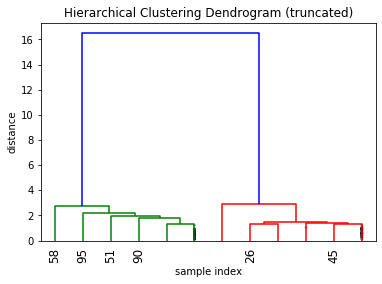

In [14]:
# trimming and truncating the dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# from documentation of "lastp"
# The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage;
# they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.

In [27]:
# we can also use the scikitlearn module hierarchical clustering to perform the same task 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
np.random.seed(2000)

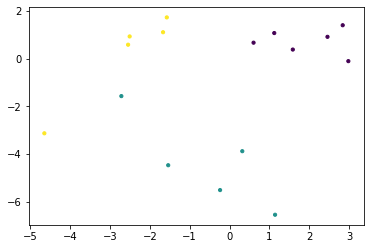

In [28]:
k = 3
m = 16
X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=1.3)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 10);

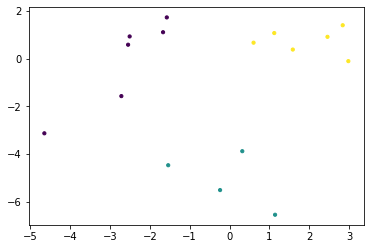

In [29]:
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust
assigned_clust = agg_clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = assigned_clust, s = 10);

In [30]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'single')

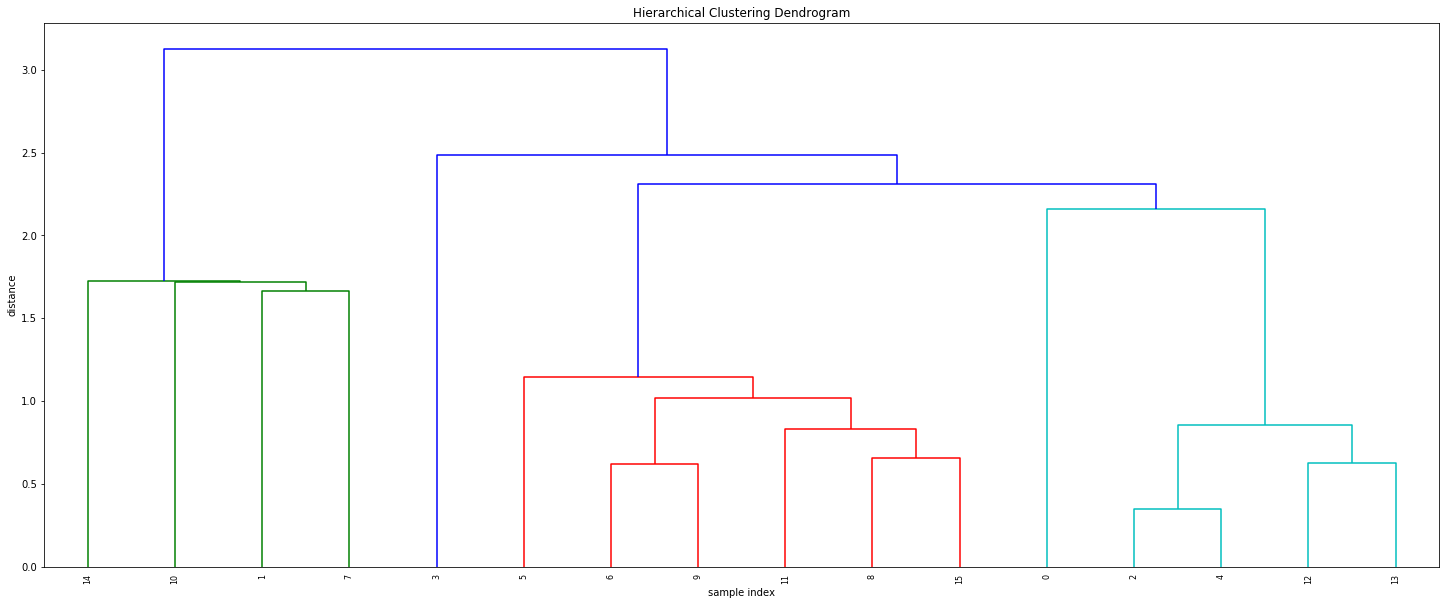

In [31]:
# calculate and construct the dendrogram
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#### Why is index 3 not in any cluster?

![](./img/outlier_detect.png)


### Evaluating number of clusters
For hierarchical agglomerative clustering, or clustering in general, it is generally difficult to truly evaluate the results. Therefore, it is up you, the data scientists, to decide.

When we are viewing dendrograms for hierarchical agglomerative, we can visually examine where the natural cutoff is, despite it not sounding exactly statistical, or scientific. We might want to interpret the clusters and assign meanings to them depending on domain-specific knowledge and shape of dendrogram. However, we can evaluate the quality of our clusters using measurements such as Sihouette score.

### Silhouette Scores

Silhouette scores are the mean silhouette coefficient for all data points.  The score can vary between -1 and +1.

- Scores close to +1 indicate that the data point was well inside its own cluster and far from other clusters.  - Scores close to 0 indicate that the data is close to a cluster boundary
- Scores close to -1 indicates that the data point might be assigned to the wrong cluster

In [24]:
# evaluation - silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, assigned_clust)

0.5620424293463655

## Your Turn!

In your group use the [seeds dataset](https://data.world/databeats/seeds) to cluster the seeds.

1.  Use a heirarchical clustering model to create 3 clusters.

2. Create a dendrogram of your clusters

2. Evaluate the model using the silhouette score.


**BONUS**:  Repeat the process with 5 clusters.  Which one would you say is better and why?

In [104]:
#importing the sesds data
seeds = pd.read_csv('https://query.data.world/s/732bbf54vgcsrq6hksdvor7wqmi2hi', usecols=[0, 1, 2, 3, 4, 5, 6, 7])

In [105]:
#your code here

#### Strengths
- Intuitive and easy to implement
- It takes individual relationships into consideration
- Allows us to look at dendrogram and decide number of clusters

#### Weaknesses
- Very sensitive to outliers
- Cannot undo the previous merge, which might lead to problems later on 


### More on Heirarchical Clustering

- [from MIT on just hierarchical](http://web.mit.edu/6.S097/www/resources/Hierarchical.pdf)
- [from MIT comparing clustering methods](http://www.mit.edu/~9.54/fall14/slides/Class13.pdf)
- [fun CMU slides on clustering](http://www.cs.cmu.edu/afs/andrew/course/15/381-f08/www/lectures/clustering.pdf)

___

# K-Means Clustering


Without the aid of an algorithm, how would you separate this data into groups?

How many groups are there?

![](./img/clusters.png)



## How the K-Means Algorithm Works


- The process begins with k centroids initialized at random.
- These centroids are used to assign points to its nearest cluster.
- The mean of all points within the cluster is then used to update the position of the centroids.
- The above steps are repeated until the values of the centroids stabilize.


![](./img/centroid.gif)


[Visualizing K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)



## Vocabulary for K-Means

- ‘K’ is the number of clusters, or groups, in the dataset you specify the algorithm define. 
- The centroids, or cluster centers, are the points at the center of each cluster. The coordinates of the centroid are the mean value of each variable within the defined group.
- K-means is called such because it returns the mean values of k-specified clusters.


## K-means is an optimization algorithm

![](./img/optimization.png)


In [67]:
from sklearn.cluster import KMeans
np.random.seed(110119)

X, y = make_blobs(n_samples=700, n_features=2, centers=4, cluster_std=2.5)

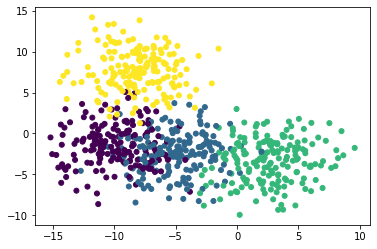

In [68]:
# can you plot this dataset

plt.scatter(X[:, 0], X[:, 1], c=y,s=25)

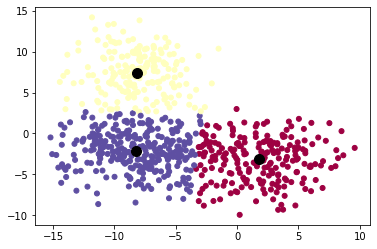

In [73]:
# let's instantiate kmeans algorithm
# don't forget to check its parameters
k_means3 = KMeans(n_clusters=3)

# dont forget to fit the model!
k_means3.fit(X)

# we make a prediction for each point
y_hat = k_means3.predict(X)

# we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means3.cluster_centers_

# note that the colors are different - Is this a problem?
plt.scatter(X[:, 0], X[:, 1], c=y_hat, s=25, cmap='Spectral')


# also let's mark the cluster centers too.
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100)

In [75]:
display(cl_centers)

array([[ 1.76841186, -3.18047966],
       [-8.12251458,  7.44377881],
       [-8.27807836, -2.15126363]])

In [76]:
# evaluation - silhouette score 
silhouette_score(X, y_hat)

0.4870916403989484

## Finding the Optimal K

Text(0.5, 1.0, 'Silhouette Score Elbow for KMeans')

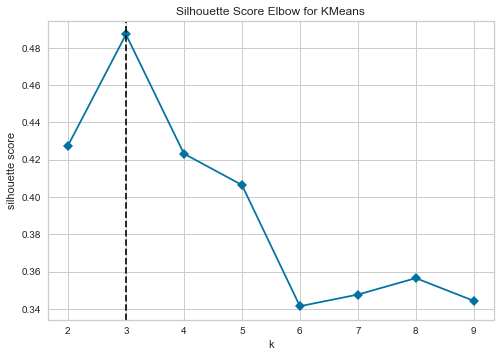

In [130]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,
                              k=(2,10),
                              metric='silhouette', 
                              timings=False, 
                              locate_elbow=True)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.ax.set_xlabel("k")
visualizer.ax.set_ylabel('silhouette score')
visualizer.ax.set_title('Silhouette Score Elbow for KMeans')

## Assumptions in K-Means Clustering

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


![](./img/ideal_clusters.png)

### Why won't k-means work well here?

![](./img/k-means_struggles.png)

## Your Turn!

In your group you will use the `seeds` data again to cluster but this time using k-means clustering.

1. Get your data ready for clustering my preprocessing your data!  What type of preprocessing will you need to do?  Why?

2. Use a k-means clustering model to create 5 clusters.

2. Evaluate the model using the silhouette score.

3.  Now find the optimal k value between 2 and 15 by creating a visualization of the silhouette scores for each value of k. Which was the best k value?


**BONUS**:  Compare the two methods of clustering.  Which do you think is better and why?

In [33]:
#importing the sesds data
seeds = pd.read_csv('https://query.data.world/s/732bbf54vgcsrq6hksdvor7wqmi2hi', usecols=[0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
#your code here

In [ ]:
#__SOLUTION__

## Strengths

- It is fast  to implement
- Works well for large-scale data
- Simple to implement and visualize
- Non-parametric


## Weaknesses

- You need to specify the number of clusters
- Does not perform well when clusters are different sizes, densities, or non-spherical shapes
- You will need to scale your data

## K-Means Clustering Additional Resources

[StatQuest](https://www.youtube.com/watch?v=4b5d3muPQmA)

[Andrew Ng on KMeans](https://www.youtube.com/watch?v=hDmNF9JG3lo)

[Stanford CS221](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

[Real Python](https://realpython.com/k-means-clustering-python/)